In [4]:
import src
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import pyaldata
import yaml

from sklearn.decomposition import PCA

sns.set_context('talk')

with open('../params.yaml','r') as f:
    params = yaml.safe_load(f)
    inspection_params = params['inspection']

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
td = (
    src.data.load_clean_data('../data/trial_data/Prez_20220720_RTTCSTCO_TD.mat',keep_unsorted=True,verbose=True)
    .pipe(pyaldata.add_firing_rates,method='smooth', std=0.05, backend='convolve')
    .pipe(src.data.rebin_data,new_bin_size=inspection_params['bin_size'])
    .pipe(pyaldata.soft_normalize_signal,signals=['M1_rates','PMd_rates','MC_rates'])
    .pipe(pyaldata.dim_reduce,PCA(n_components=2),'M1_rates','M1_pca')
    .pipe(pyaldata.dim_reduce,PCA(n_components=2),'PMd_rates','PMd_pca')
    .pipe(pyaldata.dim_reduce,PCA(n_components=2),'MC_rates','MC_pca')
    .assign(
        **{
            'idx_ctHoldTime': lambda x: x['idx_ctHoldTime'].map(lambda y: y[-1] if y.size>1 else y),
            'Ambiguous Hold Period': lambda x: x['bin_size']*(x['idx_pretaskHoldTime'] - x['idx_ctHoldTime']),
            'Cued Hold Period': lambda x: x['bin_size']*(x['idx_goCueTime'] - x['idx_pretaskHoldTime']),
            'Movement Period': lambda x: x['bin_size']*(x['idx_endTime'] - x['idx_goCueTime']),
        }
    )
)
td

Removed 76 trials that monkey aborted
2 trials with high firing rates removed. Dropping trials with IDs:
[295 337]
Removed 0 neurons from M1_spikes.
Removed 0 neurons from MC_spikes.
Removed 0 neurons from PMd_spikes.


,M1_spikes,M1_unit_guide,MC_spikes,MC_unit_guide,PMd_spikes,PMd_unit_guide,bin_size,cst_cursor_command,ct_location,cursor_pos,...,rt_locations,task,trial_id,session_date,M1_rates,MC_rates,PMd_rates,M1_pca,PMd_pca,MC_pca
1,"[[2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,...","[[34, 1], [36, 1], [41, 1], [42, 1], [44, 1], ...","[[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...","[[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...",0.01,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan...","[60, -420, 0]","[[68.7752446489057, -510.5224220489461], [68.8...",...,nan,CST,2,2022-07-20,"[[0.19046902612970082, 0.0802318442300435, 0.1...","[[0.1152590338860025, 0.1976634627391691, 0.26...","[[0.12077293625238973, 0.20711952876887194, 0....","[[0.2694120814565782, -0.016080313877205998], ...","[[-0.2029441289492678, -0.07128627178953693], ...","[[-0.33049265304276704, -0.01759622360859902],..."
2,"[[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,...","[[34, 1], [36, 1], [41, 1], [42, 1], [44, 1], ...","[[0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...","[[0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...",0.01,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan...","[60, -420, 0]","[[111.78317092216045, -336.64580990372804], [1...",...,nan,CST,3,2022-07-20,"[[0.1277781886963704, 0.11885342417193608, 0.1...","[[0.021982864235490722, 0.06450545592121582, 0...","[[0.023034507330538058, 0.06759134666710444, 0...","[[0.2441603751359378, 0.03694868197244525], [0...","[[-0.3953454175001357, 0.11396838308965575], [...","[[-0.4367333472626866, 0.0790515540507021], [-..."
3,"[[2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,...","[[34, 1], [36, 1], [41, 1], [42, 1], [44, 1], ...","[[1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...","[[1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...",0.01,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan...","[60, -420, 0]","[[143.42444687543966, -366.9432860176186], [14...",...,"[[60.0, -420.0, 0.0], [110.0, -420.0, 0.0], [6...",RTT,4,2022-07-20,"[[0.18849299971976502, 0.12751333975091866, 0....","[[0.061451651469128454, 0.11710378499054913, 0...","[[0.06439145058968294, 0.1227059388122697, 0.1...","[[0.19476534853603816, 0.023790617589596625], ...","[[-0.30784431406839935, 0.11926163058347164], ...","[[-0.3529846380206452, 0.10305520449237444], [..."
4,"[[2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...","[[34, 1], [36, 1], [41, 1], [42, 1], [44, 1], ...","[[0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...","[[0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...",0.01,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan...","[60, -420, 0]","[[47.12483506988383, -411.41629950909254], [47...",...,"[[91.25, -420.0, 0.0], [10.0, -420.0, 0.0], [9...",RTT,5,2022-07-20,"[[0.1411726180826633, 0.11562143226505178, 0.1...","[[0.00014155437755766016, 0.10033518531837546,...","[[0.0001483262286748544, 0.10513514239858206, ...","[[0.3053235800971094, 0.022972031660504915], [...","[[-0.3894033977868836, 0.010230590599446213], ...","[[-0.45990458191623834, -0.003461788789542906]..."
5,"[[2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[34, 1], [36, 1], [41, 1], [42, 1], [44, 1], ...","[[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...","[[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0,...","[[2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [8, 1...",0.01,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan...","[60, -420, 0]","[[54.13489480402326, -410.83945751188196], [54...",...,"[[41.25, -420.0, 0.0], [22.5, -420.0, 0.0], [7...",RTT,6,2022-07-20,"[[0.24267244372661542, 0.0941899614253532, 0.0...","[[0.10021351989

In [20]:
# plot out event timing
td.columns

Index(['M1_spikes', 'M1_unit_guide', 'MC_spikes', 'MC_unit_guide',
       'PMd_spikes', 'PMd_unit_guide', 'bin_size', 'cst_cursor_command',
       'ct_location', 'cursor_pos', 'date_time', 'hand_pos', 'idx_cstEndTime',
       'idx_cstStartTime', 'idx_ctHoldTime', 'idx_endTime', 'idx_failTime',
       'idx_goCueTime', 'idx_pretaskHoldTime', 'idx_rewardTime',
       'idx_rtHoldTimes', 'idx_rtgoCueTimes', 'idx_startTime', 'lambda',
       'monkey', 'raw_left_eye_pos', 'raw_left_pupil', 'rel_cursor_pos',
       'rel_hand_pos', 'result', 'rt_locations', 'task', 'trial_id',
       'session_date', 'M1_rates', 'MC_rates', 'PMd_rates', 'M1_pca',
       'PMd_pca', 'MC_pca'],
      dtype='object')

In [79]:
@interact(trial_id=td['trial_id'])
def inspect_rasters(trial_id):
    trial = td.loc[td['trial_id']==trial_id,:].squeeze()
    _,ax=plt.subplots(1,1,figsize=(10,4),sharex=True)
    src.plot.make_trial_raster(
        trial,
        ax,
        sig='MC_spikes',
        events=[
            'idx_ctHoldTime',
            'idx_pretaskHoldTime',
            'idx_goCueTime',
            'idx_cstEndTime',
            'idx_rtHoldTimes',
        ],
        ref_event_idx=trial['idx_goCueTime'])
    ax.set_title(trial['task'])


interactive(children=(Dropdown(description='trial_id', options=(2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 1…

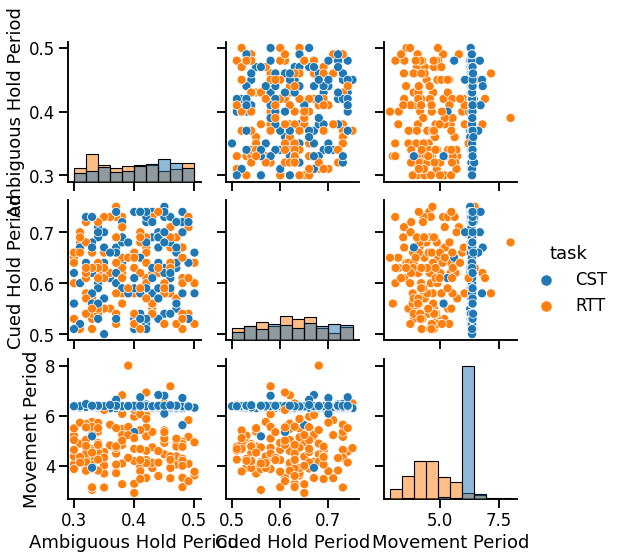

In [120]:
sns.pairplot(
    data=td.query('task=="CST" | task=="RTT"'),
    vars=['Ambiguous Hold Period','Cued Hold Period','Movement Period'],
    hue='task',
    diag_kind='hist',
)
sns.jointplot(
    data=td.query('task=="CST" | task=="RTT"'),
    x='Ambiguous Hold Period',
    y='Cued Hold Period',
    hue='task',
)